In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
 #%%

# google colab configurations 
# these might change

# torch imports
import torch

# import utils
import json
from datetime import date
import os

google_colab = input('Running on Colab?\n')
if google_colab=='yes' : 

    from pydrive.auth import GoogleAuth
    from pydrive.drive import GoogleDrive
    from google.colab import auth
    from oauth2client.client import GoogleCredentials

    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)


    COLAB_CONFIG = '1o5nZNVmNBq3UQRxwYIwOATX0c0GyHPRN'
    COLAB_CONFIG_FILE ='colab_config.json'

    colab_json = drive.CreateFile({'id': COLAB_CONFIG})
    colab_json.GetContentFile(COLAB_CONFIG_FILE)

    with open(COLAB_CONFIG_FILE) as f:
        temp = f.read()
    colab_config = json.loads(temp)

    for key in colab_config:
        globals()[key] = drive.CreateFile({"id":colab_config[key]['id']})
        globals()[key].GetContentFile(colab_config[key]['file'])

    from trainer import RegressionTrainer
    from datageneration import DataGenerator
    from helpers import Helper, Plotter
    
else:
    import sys, os 
    BASE_DIR = '/'.join(os.getcwd().split('/')[:-1])
    sys.path.append(BASE_DIR)
    print(f'Top level directory is set to {BASE_DIR}')

    # custom imports
    from cnp.trainer import RegressionTrainer
    from cnp.datageneration import DataGenerator
    from cnp.helpers import Helper

Running on Colab?

Top level directory is set to /Users/frederik/Google Drive/University/UC3M/TFM/cnp_repo/neural-processes


In [4]:

# we first get the variables for the configuration file
os.environ["CHECKPOINT_DIR"] = "checkpoints"
os.environ["MODEL_PARAMS"] = "default"

CHECKPOINT_DIR = os.environ['CHECKPOINT_DIR']
MODEL_PARAMS = os.environ['MODEL_PARAMS']

if google_colab=='yes':
    config_dir = ''
else:
    config_dir = os.path.join(BASE_DIR,'configs')

with open(os.path.join(config_dir,'paper_config.json')) as f:
    file = f.read()
    default_conf = json.loads(file)



## Generating a dataset

In [6]:
# creating an instance of to orchestrate the training
trainer = RegressionTrainer(**default_conf['experiment_params'])

  0%|          | 0/200000 [00:00<?, ?it/s]

Mean loss at epoch 0 : 0.6344516277313232
 Validation loss after 0 equals 0.9180638790130615
torch.Size([1, 400, 1]) torch.Size([1, 400, 1])


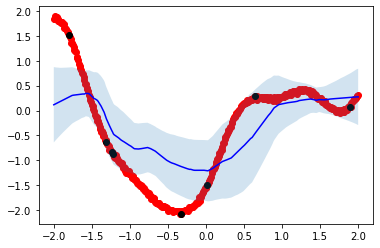

  2%|▏         | 4995/200000 [01:24<44:11, 73.55it/s]  

Mean loss at epoch 5000 : 0.5997527241706848
 Validation loss after 5000 equals 0.8259667754173279
torch.Size([1, 400, 1]) torch.Size([1, 400, 1])


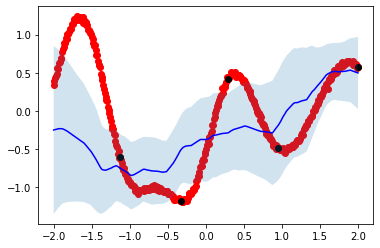

  3%|▎         | 6416/200000 [01:45<44:02, 73.26it/s]  Exception ignored in: <generator object tqdm.__iter__ at 0x11eba2e40>
Traceback (most recent call last):
  File "/Users/frederik/Google Drive/University/UC3M/TFM/cnp_repo/neural-processes/tfm/lib/python3.8/site-packages/tqdm/std.py", line 1180, in __iter__
    self.close()
  File "/Users/frederik/Google Drive/University/UC3M/TFM/cnp_repo/neural-processes/tfm/lib/python3.8/site-packages/tqdm/std.py", line 1268, in close
    self._decr_instances(self)
  File "/Users/frederik/Google Drive/University/UC3M/TFM/cnp_repo/neural-processes/tfm/lib/python3.8/site-packages/tqdm/std.py", line 572, in _decr_instances
    cls.monitor.exit()
  File "/Users/frederik/Google Drive/University/UC3M/TFM/cnp_repo/neural-processes/tfm/lib/python3.8/site-packages/tqdm/_monitor.py", line 53, in exit
    self.join()
  File "/Users/frederik/.pyenv/versions/3.8-dev/lib/python3.8/threading.py", line 1011, in join
    self._wait_for_tstate_lock()
  File "/Users

KeyboardInterrupt: 

In [25]:
model_weights = trainer.run_training(**default_conf['training_params'])